# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### План исследования
#### 1. [Изучение и предобработка данных](#data)
#### 2. [Подготовка данных](#ready)
#### 3. [Анализ данных](#study)
#### 4. [Проверка гипотез](#check)
#### 5. [Общий вывод](#conclusion)

### 1. Изучение и предобработка данных
<a id="data"></a>

В нашем распоряжении пять датафреймов, в которых содержится информация о пользователях «Мегалайна», их звонках, СМС, Интернет-трафике, а также данные о двух исследуемых тарифах – «Смарт» и «Ультра». Посмотрим на каждый датафрейм в отдельности. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
data_users = pd.read_csv('/datasets/users.csv')
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В представленной выборке информация о 500 пользователях, в том числе уникальный id, город, фамилия, имя, дата регистрации и дата прекращения пользования тарифом. Значения последнего показателя заполнены для 38 человек - за исследуемый период такое количество пользователей отказалось от использования своего тарифа, т.е. 7,6% выборки.

В этом датафрейме смущает тип данных для даты регистрации и отказа от тарифа - сейчас он строковый. Сделаем из него дату.

In [4]:
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'])
data_users['churn_date'] = data_users['churn_date'].dt.round('1d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])

Теперь с данными этих столбцов можно работать как с датами.

Заполним пустые значения нулями - так с ними будет проще работать.

In [5]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [6]:
data_users['churn_date'] = data_users['churn_date'].fillna(0)

In [7]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,0,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,0,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,0,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25 00:00:00,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [8]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [9]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Датафрейм со звонками содержит в себе информацию о 200 тыс. звонков - именно столько звонков соверщили абоненты «Мегалайн» за... непонятно какой период. Всё из-за того, что информация в столбце call_date имеет строковый тип данных. Во-первых, сделаем из него дату, а во-вторых - создадим новый столбец, куда положим номер месяца для каждого звонка. Впоследствии это пригодится для группировки данных для каждого пользователя по каждому месяцу - причём не только со звонками, но и с СМС, и c трафиком.

In [10]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_calls['month'] = data_calls['call_date'].dt.month

Так за какой период у нас 202607 звонков?

In [11]:
data_calls['call_date'].min()

Timestamp('2018-01-01 00:00:00')

In [12]:
data_calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

За 2018 год. Ни раньше, ни позже - с этим всё чисто.

При просмотре таблицы мы заметили, что продолжительность некоторых звонков составляла 0 минут. Сколько всего таких звонков в датафрейме?

In [13]:
len(data_calls.query('duration == 0'))/len(data_calls)

0.19551644316336553

Почти 20%! Или около 40 тыс. звонков.

Почему так много? Скорее всего, речь идёт о пропущенных звонках - у каких ещё может быть продолжительность 0 секунд.
Что с ними делать? Удалять! Да, их очень много, но ещё раз вчитаемся в суть задания: «Выясните, какой тариф приносит больше денег». Оба тарифа не предусматривают взимание денег за пропущенные звонки (т.е. звонки длительностью 0 секунд), так что от них можно смело избавляться.

In [14]:
data_calls = data_calls[data_calls['duration'] != 0]

Переходим к СМСкам.

In [15]:
data_sms = pd.read_csv('/datasets/messages.csv')
data_sms

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [16]:
data_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


120 тыс. сообщений, по 240 в среднем на абонента. Преобразуем тип данных в столбце 'message_date' по примеру 'call_date' в предыдущем датафрейме.

In [17]:
data_sms['message_date'] = pd.to_datetime(data_sms['message_date'])
data_sms['month'] = data_sms['message_date'].dt.month

Переходим к Интернет-трафику.

In [18]:
data_traffic = pd.read_csv('/datasets/internet.csv')
data_traffic

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [19]:
data_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Почти 150 тыс. сессий в Интернете, для каждой есть информация по объёму использованных данных. Снова есть столбец с датой, где тип данных не дата (речь про 'mb_used') - знаем что делать. А ещё есть сессии, где было использовано 0 Мб - логика та же, что и с пропущенными звонками: нет Мегабайт (минут) - абонент ничего не платит. Удаляем.

In [20]:
data_traffic['session_date'] = pd.to_datetime(data_traffic['session_date'])
data_traffic['month'] = data_traffic['session_date'].dt.month
data_traffic = data_traffic[data_traffic['mb_used'] != 0]

Наконец, датафрейм с тарифами.

In [21]:
data_tariff = pd.read_csv('/datasets/tariffs.csv')
data_tariff

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Информация о тарифах соответствует той, что была предосталена в условии задачи.

Проверим наличие дубликатов в имеющихся датафреймах.

In [22]:
dup_check = [data_calls, data_users, data_sms, data_tariff]
duplicates = 0

for dataframe in dup_check:
    duplicates += dataframe.duplicated().sum()
print(duplicates)

0


Дупликаты не обнаружены.

По условиям задачи, мобильный оператор округляет вверх все значения минут и мегабайт - если абонент говорил по телефону всего секунду, то она будет засчитываться как минута. Обработаем столбцы в соответствующих датафреймах и переведём их в целочисленный тип данных.

In [23]:
np.warnings.filterwarnings('ignore', category = np.VisibleDeprecationWarning)
data_calls.loc[:,'duration'] = np.ceil(data_calls.loc[:,'duration']).astype('int')
data_traffic.loc[:,'mb_used'] = np.ceil(data_traffic.loc[:,'mb_used']).astype('int')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Вывод

Ознакомились с предоставленными данными: удалили те, которые не пригодятся для анализа, а также поменяли тип данных на дату в некоторых строковых столбцах. Убедились в отсуствии дубликатов, округлили значения минут и мегабайт.

### 2. Подготовка данных
<a id="ready"></a>

На этом этапе необходимо посчитать для каждого абонента количество сделанных звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика по месяцам, а также помесячную выручку.

Для начала сгруппируем необходимую информацию по звонкам, СМС и трафику в сводные таблицы для каждого пользователя. Для каждого датафрейма построим сводные таблицы.

In [24]:
calls_pivot = data_calls.pivot_table(index = ['user_id','month'], values = ['duration','id'], aggfunc={'duration': 'sum', 
                                                                                                       'id': 'count'})
calls_pivot.columns = ['call_duration', 'call_number']
calls_pivot

call_duration  call_number
user_id month                            
1000    5                159           17
        6                172           28
        7                340           41
        8                408           42
        9                466           46
...                      ...          ...
1498    10               247           30
1499    9                 70            8
        10               449           44
        11               612           62
        12               492           56

[3168 rows x 2 columns]

In [25]:
sms_pivot = data_sms.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
sms_pivot.columns = ['sms_number']
sms_pivot

sms_number
user_id month            
1000    5              22
        6              60
        7              75
        8              81
        9              57
...                   ...
1498    10             42
1499    9              11
        10             48
        11             59
        12             66

[2717 rows x 1 columns]

In [26]:
traffic_pivot = data_traffic.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
traffic_pivot

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3201 rows x 1 columns]

Объединим полученные сводные таблицы по столбцам 'user_id' и 'month'.

In [27]:
data = calls_pivot.merge(sms_pivot, on = ['user_id', 'month'], how = 'outer')\
.merge(traffic_pivot, on = ['user_id', 'month'], how = 'outer')
data = data.reset_index()
data

,user_id,month,call_duration,call_number,sms_number,mb_used
0,1000,5,159.0,17.0,22.0,2256.0
1,1000,6,172.0,28.0,60.0,23257.0
2,1000,7,340.0,41.0,75.0,14016.0
3,1000,8,408.0,42.0,81.0,14070.0
4,1000,9,466.0,46.0,57.0,14581.0
...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19588.0
3210,1489,11,NaN,NaN,20.0,17516.0
3211,1489,12,NaN,NaN,35.0,17341.0
3212,1240,2,NaN,NaN,NaN,961.0


Добавим информацию о тарифах.

In [28]:
tariff_name = data_users[['user_id', 'tariff']] #датафрейм, где каждому юзеру по id соответствует тариф
data = data.merge(tariff_name, on = ['user_id'], how = 'left')
data

,user_id,month,call_duration,call_number,sms_number,mb_used,tariff
0,1000,5,159.0,17.0,22.0,2256.0,ultra
1,1000,6,172.0,28.0,60.0,23257.0,ultra
2,1000,7,340.0,41.0,75.0,14016.0,ultra
3,1000,8,408.0,42.0,81.0,14070.0,ultra
4,1000,9,466.0,46.0,57.0,14581.0,ultra
...,...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19588.0,smart
3210,1489,11,NaN,NaN,20.0,17516.0,smart
3211,1489,12,NaN,NaN,35.0,17341.0,smart
3212,1240,2,NaN,NaN,NaN,961.0,ultra


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id          3214 non-null int64
month            3214 non-null int64
call_duration    3168 non-null float64
call_number      3168 non-null float64
sms_number       2717 non-null float64
mb_used          3201 non-null float64
tariff           3214 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 200.9+ KB


При объединении таблиц образовались пропущенные значения: нередки ситуации, когда абонент не пользовался Интернетом, СМС или звонками в течение одного месяца. Поэтому заполним пропущенные значения нулями.

In [30]:
for column in data[['sms_number','mb_used','call_duration','call_number']]:
    data[column] = (data[column].fillna(0)).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
user_id          3214 non-null int64
month            3214 non-null int64
call_duration    3214 non-null int64
call_number      3214 non-null int64
sms_number       3214 non-null int64
mb_used          3214 non-null int64
tariff           3214 non-null object
dtypes: int64(6), object(1)
memory usage: 200.9+ KB


Теперь напишем функцию, которая принимает тариф, количество минут, СМС, Мб абонента, а выдаёт его общие расходы за месяц.

In [31]:
def spending(row):
    calls = row['call_duration']
    messages = row['sms_number']
    internet = row['mb_used']
    tariff = row['tariff']
    
    fix = data_tariff.loc[data_tariff['tariff_name'] == tariff, 'rub_monthly_fee'].array[0]

    # получение данных о лимитах по тарифам
    minutes_lim = data_tariff.loc[data_tariff['tariff_name'] == tariff, 'minutes_included'].array[0]
    message_lim = data_tariff.loc[data_tariff['tariff_name'] == tariff, 'messages_included'].array[0]
    internet_lim = data_tariff.loc[data_tariff['tariff_name'] == tariff, 'mb_per_month_included'].array[0]
 
    # переплата по звонкам
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * data_tariff.loc[data_tariff['tariff_name'] == tariff, 'rub_per_minute'].array[0]
 
    # переплата по сообщениям
    message_overlimit = max(messages - message_lim, 0)
    message_overpay = message_overlimit * data_tariff.loc[data_tariff['tariff_name'] == tariff, 'rub_per_message'].array[0]
 
    # переплата за трафик
    internet_overlimit = max(internet - internet_lim, 0)
    internet_overpay = np.ceil((internet_overlimit / 1024)) * data_tariff.loc[data_tariff['tariff_name'] == tariff, \
                                                                              'rub_per_gb'].array[0]
 
    return (call_overpay + 
            message_overpay + 
            internet_overpay + 
            fix)
 
data['month_payment'] = data.apply(spending, axis=1)

Важный нюанс при вычислении переплаты за трафик: даже если абонент превысил лимит на 1 Мегабайт, будет списана стоимость 1 Гигабайта. Ведь сначала ты покупаешь пакет трафика, а затем начинаешь его использовать.

In [32]:
data

,user_id,month,call_duration,call_number,sms_number,mb_used,tariff,month_payment
0,1000,5,159,17,22,2256,ultra,1950.0
1,1000,6,172,28,60,23257,ultra,1950.0
2,1000,7,340,41,75,14016,ultra,1950.0
3,1000,8,408,42,81,14070,ultra,1950.0
4,1000,9,466,46,57,14581,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,10,0,0,21,19588,smart,1550.0
3210,1489,11,0,0,20,17516,smart,1150.0
3211,1489,12,0,0,35,17341,smart,950.0
3212,1240,2,0,0,0,961,ultra,1950.0


### Вывод

Собрали все данные по ежемесячным расходам каждого абонента в единый датафрейм. Можно приступать к анализу.

### 3. Анализ данных
<a id="study"></a>

Наиболее любопытный столбец в получившемся датафрейме - 'month_payment'. Интересно посчитать средний объём трат и абонентскую плату за каждый месяц. Для какого тарифа это соотношение больше?

In [33]:
ultra_data = data.query('tariff == "ultra"')
smart_data = data.query('tariff == "smart"')

ultra_payment = ultra_data['month_payment'].mean()/1950
smart_payment = smart_data['month_payment'].mean()/550

print('Средний объём переплаты за тариф Ультра в месяц составляет {:.1%}'.format(ultra_payment - 1))
print('Средний объём переплаты за тариф Смарт в месяц составляет {:.1%}'.format(smart_payment - 1))

Средний объём переплаты за тариф Ультра в месяц составляет 6.2%
Средний объём переплаты за тариф Смарт в месяц составляет 135.4%


Ого, за тариф Смарт абоненты переплачивают почти в два раза - правда это всё равно меньше, чем средние расходы на тариф Ультра, переплата по которому составляет всего 6%.

Далее определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Построим гистограммы распределения.

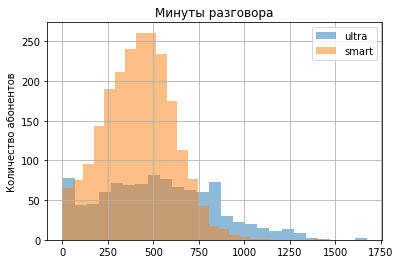

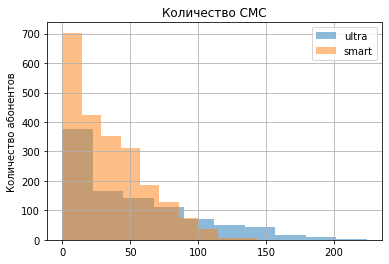

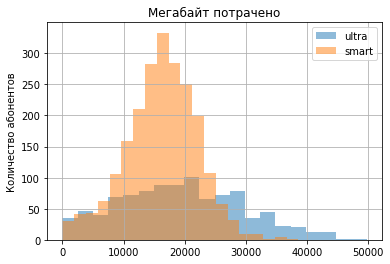

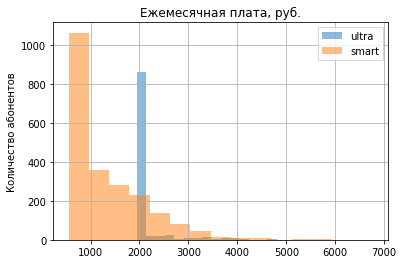

In [34]:
dict_for_hist = {
    'call_duration':['Минуты разговора', 25],
    'sms_number':['Количество СМС', 10],
    'mb_used':['Мегабайт потрачено', 20],
    'month_payment':['Ежемесячная плата, руб.', 15]
}

for column in dict_for_hist:
    ax1 = ultra_data[column].plot(kind = 'hist', alpha = .5, grid = True, label = 'ultra', bins = dict_for_hist[column][1])
    ax2 = smart_data[column].plot(kind = 'hist', alpha = .5, grid = True, label = 'smart', bins = dict_for_hist[column][1])
    ax1.set_title(dict_for_hist[column][0])
    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'upper right')
    plt.ylabel('Количество абонентов')
    plt.show()

Большинство абонентов с тарифом Смарт использует от 200 до 600 минут разговора в месяц - достаточно многим приходится переплачивать за звонки ежемесячно, т.к. в пакет включено 500 минут. Как раз ярко выраженный пик в районе 500 минут сигнализирует о том, что распределение является нормальным. А в тарифе Ультра целых 3000 минут, и большинство абонентов использует от 200 до 800 минут. Никто (!) не использует более, чем 1750 минут звонков в месяц, что ставит под сомнение необходимость наличия 3000 минут в пакете.

СМС уже не так популярны с распространением мессенджеров - это заметно по характерным пикам количества абонентов с количеством СМС не более 25 в месяц. Любопытная деталь: для тарифа Смарт заметна высокая ступень в районе 50 значений - как раз столько СМС предлагается в пакете этого тарифа. В Ультре предлагается 1000 СМС в месяц, но на практике единицам абонентов нужно 200+ сообщений в месяц.

Распределение количества использованных мегабайт интернета для абонентов тарифа смарт является нормальным: есть чётко выраженный пик в районе 18 Гб, большинству абонентов хватает от 9 до 24 Гб в месяц. В пакете тарифа Ультра предоставляется в два раза больше трафика - 30 Гб против 15 Гб. Пик выражен уж не так явно, большинство абонентов использует от 9 до 30 Гб.

Большинство абонентов в обоих случаях обходятся стандартной абонентской платой в месяц, вот только в случае "Смарта" наблюдаются ступени, идущие вправо, а в случае "Ультры" - обрыв. Редко кому приходится переплачивать за большой тариф.

Теперь рассчитаем ключевые показатели для каждого тарифа - среднее количество, дисперсию и стандартное отклонение. Построим сводную таблицу. Среднее будем рассчитывать через медиану - так мы застрахуемся от выбросов. Кстати избавляться от них мы не будем - вряд ли мобильный оператор напортачил где-то с данными своих клиентов, ведь от этого зависит их доход!

In [35]:
distribution = data.pivot_table(index = ['tariff'], values = ['call_duration','sms_number','mb_used'],\
                                aggfunc=['median','var','std']).round()
distribution

median                              var                          \
       call_duration mb_used sms_number call_duration      mb_used sms_number   
tariff                                                                          
smart            422   16531         28       36219.0   34545911.0      797.0   
ultra            518   19324         38      100874.0  101935621.0     2285.0   

                 std                      
       call_duration  mb_used sms_number  
tariff                                    
smart          190.0   5878.0       28.0  
ultra          318.0  10096.0       48.0

В целом для тарифа Ультра характерны большие значения, чем для тарифа Смарт - поскольку он предполагает больше минут, СМС и мегабайт. При этом, распределение расходов в Ультра сильнее разбросано вокруг среднего, дисперсия больше в среднем в три раза, чем у тарифа Смарт.

### Вывод

Абоненты с тарифом Ультра приносят мобильному оператору больший доход - т.к. абонентская плата по нему попросту больше. Зато абоненты со Смартом в среднем переплачивают почти в два раза - им не хватает минут, СМС и трафика в этом тарифе.

Расходы минут разгора и трафика в отношении тарифа Смарт имеют ярко выраженное нормальное распределение - пики приходятся на 500 минут и 15 Гб, как раз предоставляемые в этом тарифе. Для тарифа Ультра характерно более "размазанное" распределение - больше дисперсия и стандартное отклонение, нельзя утверждать, что все значения кучно распределены вокруг среднего.

График распределения СМС сильно смещён влево - абсолютное большинство абонентов используют сообщения по-минимуму.

### 4. Проверка гипотез
<a id="check"></a>

На этом этапе мы проверим две гипотезы. Первая - средняя выручка абонентов двух представленных тарифов различается.

Для начала сформулируем нулевую и альтернативную гипотезы. Нулевая будет звучать так: средняя выручка абонентов не различается. Соответственно, альтернативная: выручка абонентов двух тарифов различается.

Небольшое отступление про формулирование нулевой гипотезы - она всегда должна содержать равенство двух показателей, либо соответствие чему-либо. А альтернативная гипотеза, напротив, декларирует различие.

Вытащим интересующие нас данные в отдельные переменные.

In [36]:
ultra_pay = ultra_data['month_payment']
smart_pay = smart_data['month_payment']

Критический уровень статистической значимости определим на общепринятом уровне 5%.

In [37]:
alpha = 0.05

Для проверки гипотезы о равенстве средних двух генеральных совокупностей мы будем использовать метод scipy.stats.ttest_ind(). У него есть параметр equal_var, который принимает значение True, если дисперсии выборок примерно равны, и False, если наоборот. Равны ли они в нашем случае?

In [38]:
data.pivot_table(index = ['tariff'], values = ['month_payment'],aggfunc=['var']).round()

,var
,month_payment
tariff,
smart,673931.0
ultra,143491.0


Разница почти в четыре раза. Используем False.

In [39]:
results = st.ttest_ind(ultra_pay, smart_pay, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530846e-246
Отвергаем нулевую гипотезу


Результат вполне ожидаем - мы отвергаем гипотезу о равенстве средней выручки абонентов, использующих разные тарифы. Ежемесячная плата отличается почти в четыре раза, и переплатами эту разницу не закрыть.

Следующая гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Нулевая гипотеза - выручка абонентов из Москвы такая же, как и в других регионах. Альтернативная - выручка абонентов из Москвы и из других регионов отличается.

Получим необходимые данные.

In [40]:
user_city = data_users[['user_id','city']]
data = data.merge(user_city, on = ['user_id'], how = 'left')

In [41]:
moscow = data.query('city == "Москва"')['month_payment']
russia = data.query('city != "Москва"')['month_payment']

Сравним дисперсии.

In [42]:
var_moscow = np.var(moscow, ddof=1)
var_russia = np.var(russia, ddof=1)
print(var_moscow,var_russia)

566183.0292184273 656766.5955122437


Достаточно разные - False. Уровень статистической значимости оставим таким же.

In [43]:
alpha = 0.05

results = st.ttest_ind(moscow, russia, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


Мы не можем утверждать, что выручка в Москве и регионах отличается - впрочем как и говорить, что она равна. Но в самом деле: неужели секунды и мегабайты отличаются где-то в Саратове отличаются от московских?

### Вывод

Гипотеза о равных расходах абонентов на каждый тариф была опровергнута, а гипотеза о равных расходах в Москве и регионах удержалась (но подтвердить её мы тоже не можем).

### 5. Общий вывод
<a id="conclusion"></a>

Проанализировали информацию об абонентах двух тарифов - «Смарт» и «Ультра». Разница между тарифами заключается о объёме предоставляемых услуг, и, соответственно, ежемесячной абонентской плате - 550 и 1950 руб. соответственно.

Если абоненты превышают лимиты по минутам звонков/количеству СМС/мегабайт Интернета, то им приходится доплачивать за них. И тем не менее, более выгодным для мобильного оператора является тариф «Ультра» - разница в ежемесячной плате настолько большая, что даже переплаты абонентов «Смарта» не позволяют сравняться по итоговым платежам за месяц. Хотя абоненты «Смарта» переплачивают намного больше, если сравнивать с ежемесячной платой по тарифу - 135% против 6%.

Большинству абонентов каждого тарифа хватает примерно 45 СМС в месяц - это меньше бесплатно предоставляемого количества сообщений в обоих тарифах. Их количество можно смело уменьшить - с развитием мессенджеров СМС теряют свою актуальность.

Большинство абонентов тарифа «Смарт» использует от 200 до 600 минут разговора в месяц - достаточно многим приходится переплачивать за звонки ежемесячно, т.к. в пакет включено 500 минут. А в тарифе «Ультра» целых 3000 минут, и большинство абонентов использует от 200 до 800 минут. Никто (!) не использует более, чем 1750 минут звонков в месяц, что ставит под сомнение необходимость наличия 3000 минут в пакете.

Также была проверена гипотеза о равенстве выручки с абонентов из Москвы и регионов - в 51% случаев расходы совпадают. Скорее всего, это объясняется редкими переплатами абонентов тарифа «Ультра» - абсолютное большинство платит фиксированную ежемесячную сумму, что характерно для всей страны в целом.